# ***AI-Powered Image Analysis for Environmental Monitoring***

**Step 1: Unzipping the EuroSAT Dataset**

In [1]:
import zipfile

zip_path = '/content/EuroSAT.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/EuroSAT')

print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [2]:
import os

dataset_dir = '/content/EuroSAT'
print(os.listdir(dataset_dir))

['2750']


**Step 2: Preprocessing and Training the Model**

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 159s 233ms/step - accuracy: 0.3883 - loss: 1.5296 - val_accuracy: 0.6596 - val_loss: 0.9414
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.6849 - loss: 0.8536 - val_accuracy: 0.7448 - val_loss: 0.6914
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.7707 - loss: 0.6395 - val_accuracy: 0.7349 - val_loss: 0.7390
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.7928 - loss: 0.5659 - val_accuracy: 0.7699 - val_loss: 0.6253
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.8204 - loss: 0.4951 - val_accuracy: 0.8179 - val_loss: 0.5029
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 208s 220ms/step - accuracy: 0.8391 - loss: 0.4523 - val_accuracy: 0.8080 - val_loss: 0.5395
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 149s 220ms/step - accuracy: 0.8538 - loss: 0.3992 - val_accuracy: 0.8475 - val_lo

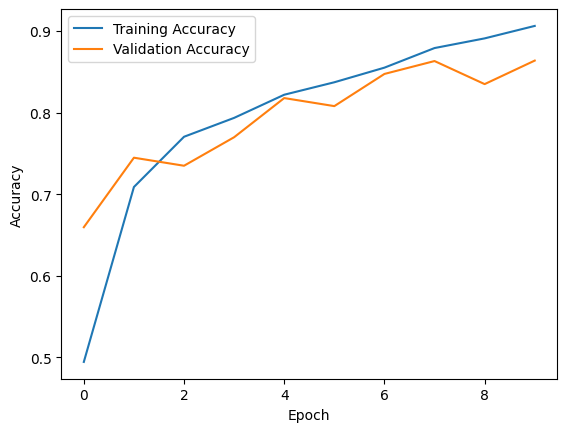

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Dataset directory
dataset_dir = '/content/EuroSAT/2750'
img_size = (64, 64)
batch_size = 32

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in EuroSAT
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10
)

# Visualize training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Step 3: Save and Evaluate the Model**

In [8]:
model.save('eurosat_cnn_model.h5')

val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8669 - loss: 0.4054
Validation Loss: 0.4000798463821411
Validation Accuracy: 0.8640740513801575


**Step 4: Visualize Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


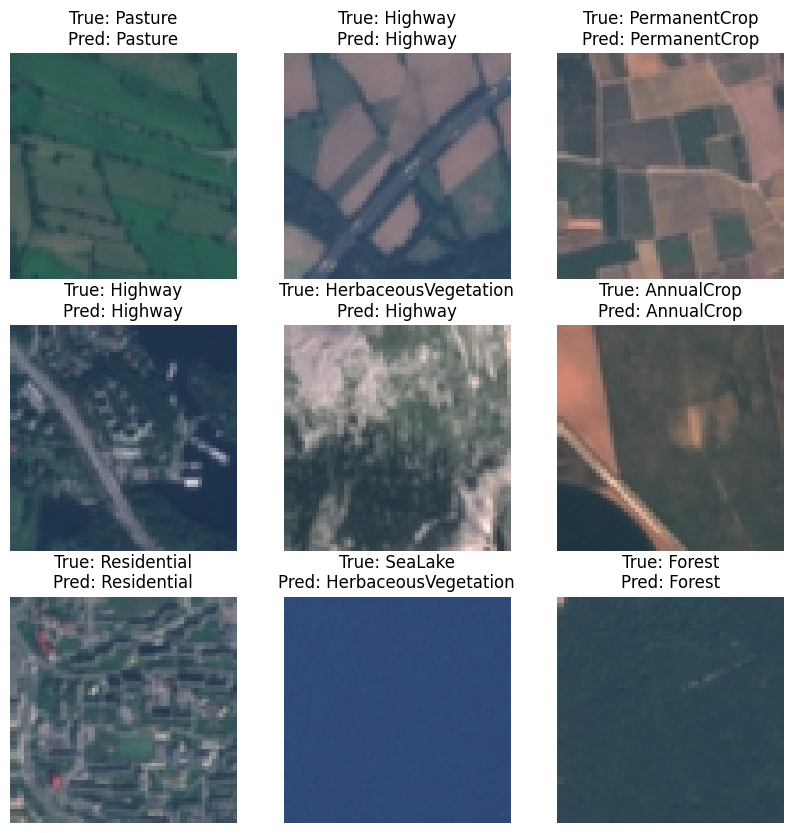

In [9]:
import numpy as np

x_batch, y_batch = next(val_generator)

predictions = model.predict(x_batch)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_batch, axis=1)

class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()